# 0.0 Importando Bibliotecas

In [83]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
from IPython.display import Image

## 0.1 Carregando Dataset

In [4]:
df_train_raw = pd.read_csv('C:/Users/dmjes/OneDrive/Escritorio/Data_Science_CDS/Data_Science_em_Produção/playground/train.csv', low_memory=False)
df_store_raw = pd.read_csv('C:/Users/dmjes/OneDrive/Escritorio/Data_Science_CDS/Data_Science_em_Produção/playground/store.csv', low_memory=False)

# merge 
df_raw = pd.merge(df_train_raw, df_store_raw, how='left', on='Store')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

# 1.0 Descrição dos Dados

In [7]:
df1= df_raw.copy()

In [8]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 1.1 Rename Columns

In [10]:
cols_old = df1.columns
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))
df1.columns = cols_new

## 1.2 Data Dimensions

In [12]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Cols: {df1.shape[1]}')

Number of Rows: 1017209
Number of Cols: 18


## 1.3 Data Types

In [14]:
df1['date'] = pd.to_datetime(df1['date'])

In [15]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [17]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [19]:
df1['competition_distance'].max()

75860.0

In [20]:
#competition_distance   
df1['competition_distance']= df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month 
df1['competition_open_since_month']= df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year
df1['competition_open_since_year']= df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

#promo2_since_week 
df1['promo2_since_week']= df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

#promo2_since_year
df1['promo2_since_year']= df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)


df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )


C:\Users\dmjes\AppData\Local\Temp\ipykernel_6672\409410766.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['promo_interval'].fillna(0, inplace=True)


In [21]:
df1.sample(5).T

,571187,55437,101475,202290,653943
store,1093,803,11,476,224
day_of_week,3,5,5,6,5
date,2014-02-05 00:00:00,2015-06-12 00:00:00,2015-05-01 00:00:00,2015-01-31 00:00:00,2013-11-22 00:00:00
sales,8990,4606,0,2218,6745
customers,908,393,0,272,480
open,1,1,0,1,1
promo,1,0,1,0,1
state_holiday,0,0,a,0,0
school_holiday,0,0,0,0,0
store_type,c,d,a,d,d


## 1.6 Change Types

In [23]:
change_type = ['competition_open_since_month', 'competition_open_since_year', 'promo2_since_week', 'promo2_since_year']
for i in change_type:
    df1[i] = df1[i].astype(int)

## 1.7 Descriptive Statistical

In [25]:
num_attributes = df1.select_dtypes(include=['int32', 'int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int32', 'int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [27]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\dmjes\AppData\Local\Temp\ipykernel_6672\3380288980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['competition_distance'])


<Axes: xlabel='competition_distance', ylabel='Density'>

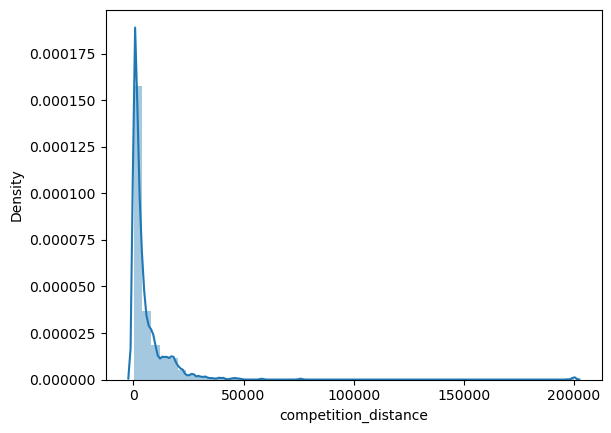

In [28]:
sns.distplot(df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [30]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

C:\Users\dmjes\AppData\Local\Temp\ipykernel_6672\2797913433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=list[i], y='sales', data=aux1, palette= 'Set2')
C:\Users\dmjes\AppData\Local\Temp\ipykernel_6672\2797913433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=list[i], y='sales', data=aux1, palette= 'Set2')
C:\Users\dmjes\AppData\Local\Temp\ipykernel_6672\2797913433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=list[i], y='sales', data=aux1, palette= 'Set2')


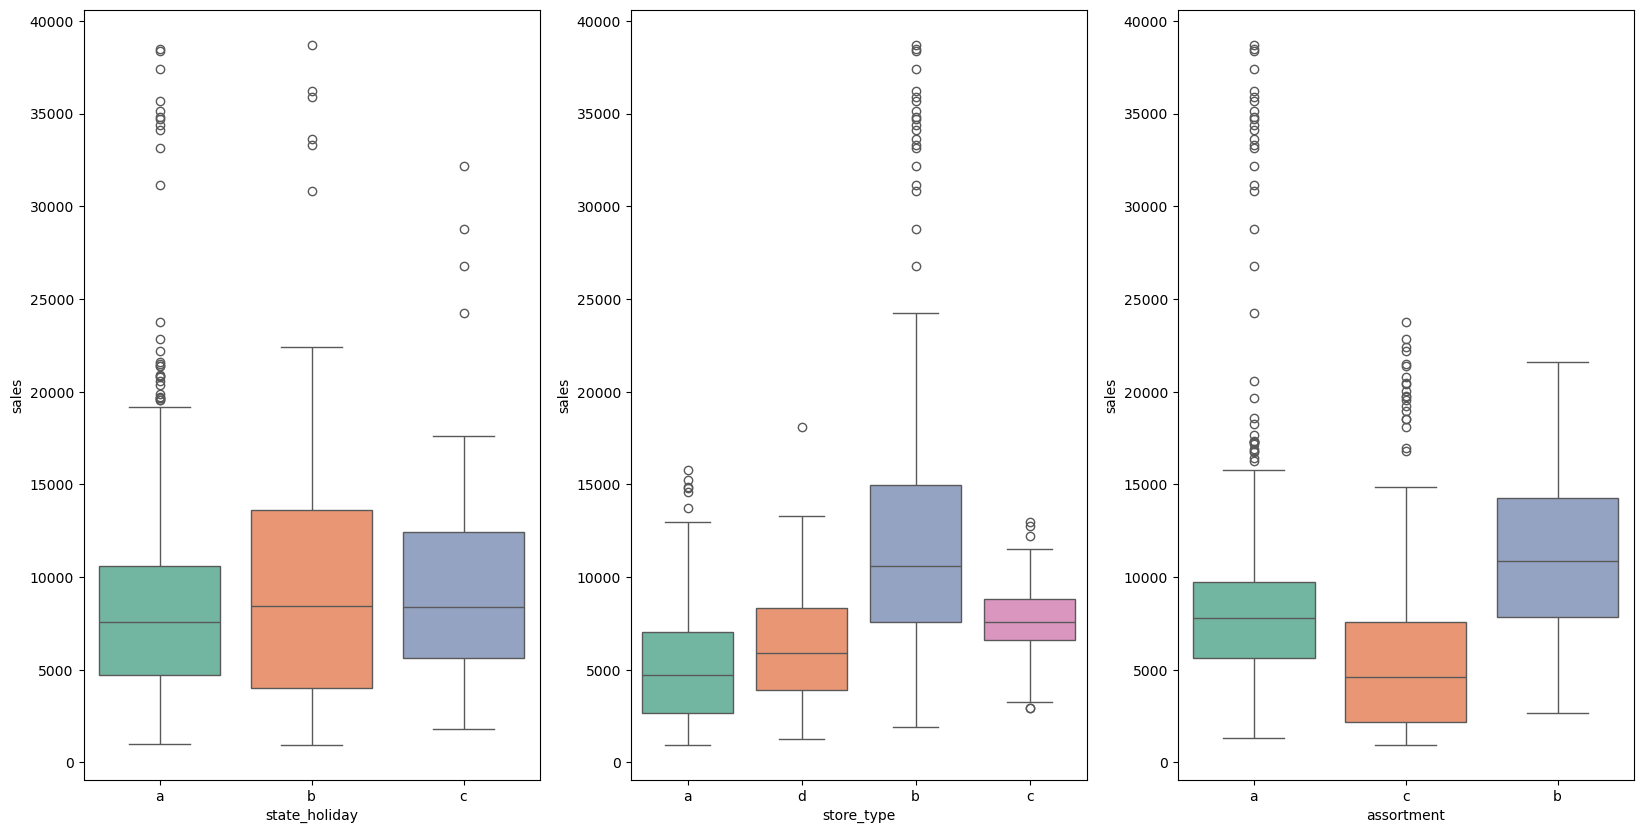

In [31]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] != 0)]
list = ['state_holiday', 'store_type', 'assortment']
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=list[i], y='sales', data=aux1, palette= 'Set2')

# 2.0 Feature Engineering

## 2.1 Mapa Mental de Hipóteses

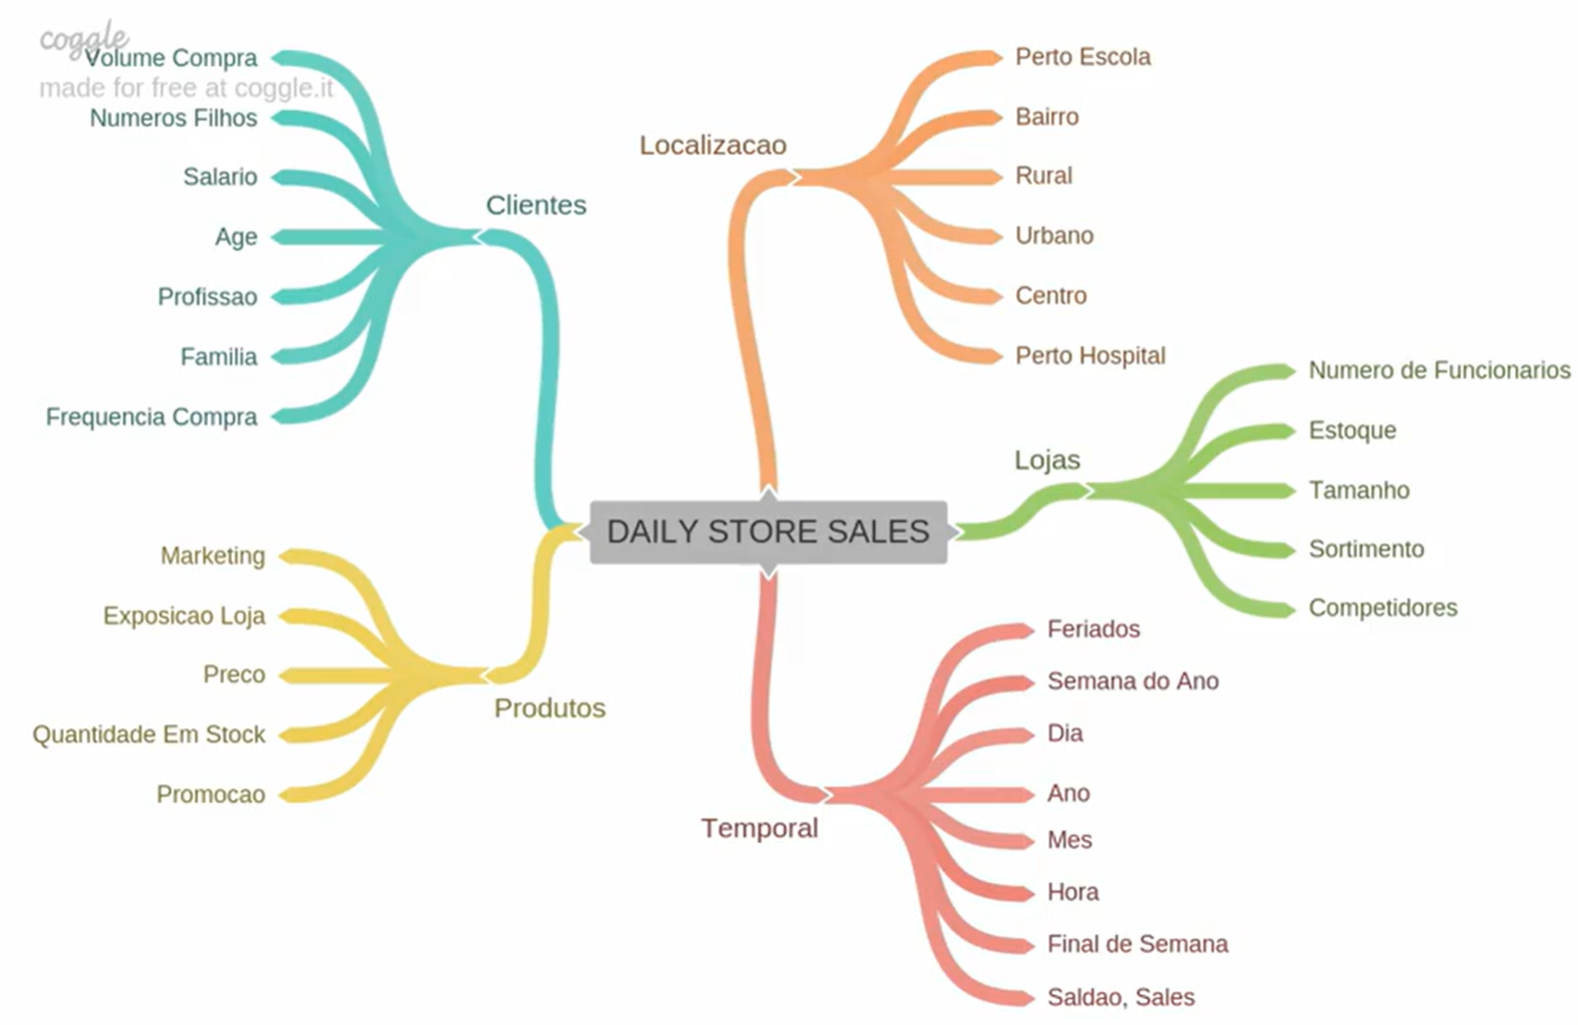

In [34]:
image_path = ('img/MindMapHypothesis.png')
Image(image_path)

## 2.2 Criação de hipóteses

In [36]:
df2 = df1.copy()

### 2.2.1 Hipóteses Lojas

 **1.** Lojas com número maior de funcionários deveriam vender mais.
 
 **2.** Lojas com maior capacidade de estoque deveriam vender mais.
 
 **3.** Lojas com maior porte deveriam vender mais.
 
 **4.** Lojas com maior sortimentos deveriam vender mais.
 
 **5.** Lojas com competidores mais próximos deveriam vender menos.
 
 **6.** Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2 Hipóteses Produtos

 **1.** Lojas que investem mais em Marketing deveriam vender mais.
     
 **2.** Lojas com maior exposição de produto deveriam vender mais.
     
 **3.** Lojas com produtos com preço menor deveriam vender mais.
     
 **5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.
     
 **6.** Lojas com promoções ativas por mais tempo deveriam vender mais.
     
 **7.** Lojas com mais dias de promoção deveriam vender mais.
     
 **8.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3 Hipóteses Tempo

 **1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

 **2.** Lojas deveriam vender mais ao longo dos anos.

 **3.** Lojas deveriam vender mais no segundo semestre do ano.
     
 **4.** Lojas deveriam vender mais depois do dia 10 de cada mês.
     
 **5.** Lojas deveriam vender menos aos finais de semana.
     
 **6.** Lojas deveriam vender menos durante os feriados escolares.

### 2.2.3 Lista Final de Hipóteses

 **1.** Lojas com maior sortimentos deveriam vender mais.
     
 **2.** Lojas com competidores mais próximos deveriam vender menos.
     
 **3.** Lojas com competidores à mais tempo deveriam vendem mais.
     
 **4.** Lojas com promoções ativas por mais tempo deveriam vender mais.
     
 **5.** Lojas com mais dias de promoção deveriam vender mais.
     
 **6.** Lojas com mais promoções consecutivas deveriam vender mais.
     
 **7.** Lojas abertas durante o feriado de Natal deveriam vender mais.
     
 **8.** Lojas deveriam vender mais ao longo dos anos.
     
 **9.** Lojas deveriam vender mais no segundo semestre do ano.
     
 **10.** Lojas deveriam vender mais depois do dia 10 de cada mês.
     
 **11.** Lojas deveriam vender menos aos finais de semana.
     
 **12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Feature Engeneering

In [94]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')


# competition since
df2['competition_since']= df2[['competition_open_since_year','competition_open_since_month']].apply(lambda x: datetime.datetime(year= x['competition_open_since_year'], month= x['competition_open_since_month'], day= 1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = pd.to_datetime(df2['promo2_since_year'].astype(str) + '0101') + pd.to_timedelta(df2['promo2_since_week'] - 1, unit='W')
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

In [95]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
